# Example Of Notebook Conversion

An example of a metatab package, inlined into a Jupyter notebook. 

Metatab has it's own Notebook conversion process, will will create a Metatab package with the notebook, it's Makrdown and HTML conversion, and the dataset it creates. FOr these conversions, input code cells are by default hidden and must be explicitly re-enabled by starting code cells with `%showinput`


In [1]:
%load_ext autoreload
%load_ext metapack
%autoreload 2
import pandas as pd

The Notebook can include inline Metatab, in a line-oriented format. These cells are code cells and start with a `%%metatab` magic. 

In [2]:
%%metatab 

Identifier: override_this
Identifier: this_one_too
Identifier: 7108517a-7163-41a5-943d-961f9a086a3f
Origin: example.com
Dataset: foobar.com 
Name: example.com-foobar.com
    
==== Contacts
Wrangler: Eric Busboom
Wrangler.Email: eric@civicknowledge.com
Wrangler.Organization: Civic Knowledge

==== References
Reference: http://public.source.civicknowledge.com/example.com/sources/renter_cost.csv
Reference.Name: reference
Reference.Title: The First Example Data File
Reference.Startline: 5
Reference.HeaderLines: 3,4
    
==== Resources
Datafile: http://public.source.civicknowledge.com/example.com/sources/renter_cost.csv
Datafile.Name: ext_resource
Datafile.Title: An Extern CSV Resource
Datafile.Startline: 5
Datafile.HeaderLines: 3,4

Identifier updated.  Set 'Identifier: 7108517a-7163-41a5-943d-961f9a086a3f'  in document


In [3]:
mt_pkg

By default, the metatab document is assigned to the variable named `mt_pkg`. This document can be displayed to show the package metadata. 

Below is a code input cell that will be shown, because it starts with a `%mt_showinput` magic. 

In [4]:
df = mt_pkg.resource('ext_resource').dataframe()
df.head()

,id,gvid,renter_cost_gt_30,renter_cost_gt_30_cv,owner_cost_gt_30_pct,owner_cost_gt_30_pct_cv
0,1,0O0P01,1447,13.617607,42.248175,8.272141
1,2,0O0P03,5581,6.235932,49.280353,4.933369
2,3,0O0P05,525,17.648159,45.219638,13.288720
3,4,0O0P07,352,28.061965,47.439353,17.383329
4,5,0O0P09,1189,11.824215,43.157895,8.916487


Dataframes can be added to the metatadata as resources with the `%mt_add_dataframe df2` magic. The `references.dataframe()` method returns objects of class `MetatabDataframe`, which have `name` and `title` fields that are used in the metadata schemas, and the `MetatabSeries.description` is used for the column description 

In [5]:
df2 = mt_pkg.reference('reference').dataframe()

df2.name = 'rent_cost'
df2.title = 'This is the Title'

df2.id.description = 'Identification'
df2.gvid.description = 'Geo ID'
df2.renter_cost_gt_30.description = 'Renters with a total cost more than 30% of income'
df2.renter_cost_gt_30_cv.description = 'Coefficient of Variation'
df2.owner_cost_gt_30_pct.description = 'Owner cost, percentage'
df2.owner_cost_gt_30_pct_cv.description = 'Owner cost, coefficient of variation'

%mt_add_dataframe df2

In [6]:
df3 = mt_pkg.reference('reference').dataframe()

In [7]:
%%mt_add_dataframe  df3 

Table: foobar
Table.Title: This is the title for the table
Table.Column: id
     .Datatype: integer
     .Description: 
Table.Column: gvid
     .Datatype: text
     .Description: aAAA
Table.Column: renter_cost_gt_30
     .Datatype: integer
     .Description: BBBB
Table.Column: renter_cost_gt_30_cv
     .Datatype: text
     .Description: CCC
Table.Column: owner_cost_gt_30_pct
     .Datatype: number
     .Description: DDD
Table.Column: owner_cost_gt_30_pct_cv
     .Datatype: text
     .Description: 

When the dataframe is added, Metatab extracts its schema and adds it to the metadata. Fetching the resource and displaying it will show the schema in a prettty format

In [8]:
mt_pkg.resource('rent_cost')

In [9]:
int_resource = df2.copy()
assert int_resource.renter_cost_gt_30.description == 'Renters with a total cost more than 30% of income'

The HTML output will include any images, but unline the default HTML converted, the images are linked as seperate files into the HTML documentation.

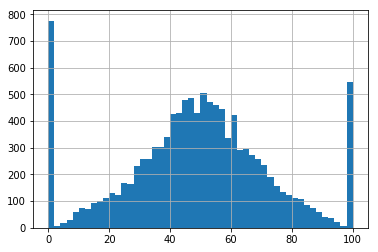

In [10]:
%matplotlib inline
_ = df.owner_cost_gt_30_pct
_ = _.astype(float)
_.hist(bins=50);


Here is an attachment.

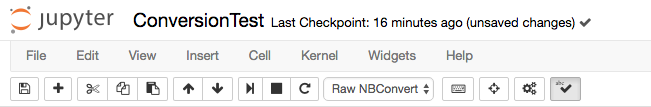


In [13]:
ranges = pd.DataFrame({'x':range(10),'y':range(10)})

In [12]:
%mt_add_dataframe ranges --materialize --title 'This is a long title with spaces'